<a href="https://colab.research.google.com/github/ohjeonsuk/python-education/blob/main/L231012_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 통계적 머신러닝
    - sklearn

        데이터 분리 : 훈련, 검증, 테스트 (K-Fold, cross_val_score)

        하이퍼파라미터 : GridSearchCV

    - 평가

        정확도, 오차행렬

        정밀도, 재현율

        F1 스코어, ROC 곡선, AUC
    - 분류

        결정트리

        랜덤포레스트(앙상블)
        
        XGBoost

        SVM

    - 회귀

        선형회귀

        다항회귀

        릿지, 라쏘, 엘라스틱넷

        로지스틱회귀

    - 차원축소 / 군집

        pca

        KMeans

        군집평가, DBSCAN

    - 텍스트 처리

        NLP, BOW

        텍스트 분류

        감성분석

        문서유사도

2. 딥러닝

    - ANN

    - 경사하강법

    - 오차역전파

    - Optimizer

    - CNN

    - ResNet

    - RNN, LSTM, GRU

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv('./drive/MyDrive/data/features.txt', sep='\s+', header=None, names=['Column_index', 'column_name'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Column_index  561 non-null    int64 
 1   column_name   561 non-null    object
dtypes: int64(1), object(1)
memory usage: 8.9+ KB


In [ ]:
df.head()

,Column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [ ]:
df.tail()

,Column_index,column_name
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"
560,561,"angle(Z,gravityMean)"


In [ ]:
dummy_df = df.groupby('column_name').count()

In [ ]:
dummy_df

,Column_index
column_name,
"angle(X,gravityMean)",1
"angle(Y,gravityMean)",1
"angle(Z,gravityMean)",1
"angle(tBodyAccJerkMean),gravityMean)",1
"angle(tBodyAccMean,gravity)",1
...,...
tGravityAccMag-max(),1
tGravityAccMag-mean(),1
tGravityAccMag-min(),1


In [ ]:
dummy_df[dummy_df['Column_index']>1]

,Column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3
"fBodyAcc-bandsEnergy()-25,32",3
"fBodyAcc-bandsEnergy()-25,48",3
"fBodyAcc-bandsEnergy()-33,40",3
"fBodyAcc-bandsEnergy()-33,48",3


In [ ]:
dummy_df[dummy_df['Column_index']>1].count()

Column_index    42
dtype: int64

fBodyGyro-bandsEnergy()-33,48 -> 3개

    fBodyGyro-bandsEnergy()-33,48

    fBodyGyro-bandsEnergy()-33,48_1

    fBodyGyro-bandsEnergy()-33,48_2

In [ ]:
df_ = pd.DataFrame([['a'], ['a'], ['a'], ['b'], ['b'], ['a']], columns=['alphabet'])

In [ ]:
df_

,alphabet
0,a
1,a
2,a
3,b
4,b
5,a


In [ ]:
df_.groupby('alphabet').cumcount()

0    0
1    1
2    2
3    0
4    1
5    3
dtype: int64

In [ ]:
f_df = pd.DataFrame(df.groupby('column_name').cumcount(), columns=['dup_cnt'])

In [ ]:
f_df

,dup_cnt
0,0
1,0
2,0
3,0
4,0
...,...
556,0
557,0
558,0
559,0


In [ ]:
f_df = f_df.reset_index()

In [ ]:
f_df.head()

,index,dup_cnt
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [ ]:
df.head()

,Column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [ ]:
df.reset_index()

,index,Column_index,column_name
0,0,1,tBodyAcc-mean()-X
1,1,2,tBodyAcc-mean()-Y
2,2,3,tBodyAcc-mean()-Z
3,3,4,tBodyAcc-std()-X
4,4,5,tBodyAcc-std()-Y
...,...,...,...
556,556,557,"angle(tBodyGyroMean,gravityMean)"
557,557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,558,559,"angle(X,gravityMean)"
559,559,560,"angle(Y,gravityMean)"


In [ ]:
n_df = pd.merge(df.reset_index(),f_df, how='outer')

In [ ]:
n_df_2 = pd.merge(df.reset_index(),f_df, how='outer')

In [ ]:
n_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561 entries, 0 to 560
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         561 non-null    int64 
 1   Column_index  561 non-null    int64 
 2   column_name   561 non-null    object
 3   dup_cnt       561 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 21.9+ KB


In [ ]:
n_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561 entries, 0 to 560
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         561 non-null    int64 
 1   Column_index  561 non-null    int64 
 2   column_name   561 non-null    object
 3   dup_cnt       561 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 21.9+ KB


In [ ]:
n_df.tail()

,index,Column_index,column_name,dup_cnt
556,556,557,"angle(tBodyGyroMean,gravityMean)",0
557,557,558,"angle(tBodyGyroJerkMean,gravityMean)",0
558,558,559,"angle(X,gravityMean)",0
559,559,560,"angle(Y,gravityMean)",0
560,560,561,"angle(Z,gravityMean)",0


In [ ]:
n_df.head()

,index,Column_index,column_name,dup_cnt
0,0,1,tBodyAcc-mean()-X,0
1,1,2,tBodyAcc-mean()-Y,0
2,2,3,tBodyAcc-mean()-Z,0
3,3,4,tBodyAcc-std()-X,0
4,4,5,tBodyAcc-std()-Y,0


In [ ]:
n_df

,index,Column_index,column_name,dup_cnt
0,0,1,tBodyAcc-mean()-X,0
1,1,2,tBodyAcc-mean()-Y,0
2,2,3,tBodyAcc-mean()-Z,0
3,3,4,tBodyAcc-std()-X,0
4,4,5,tBodyAcc-std()-Y,0
...,...,...,...,...
556,556,557,"angle(tBodyGyroMean,gravityMean)",0
557,557,558,"angle(tBodyGyroJerkMean,gravityMean)",0
558,558,559,"angle(X,gravityMean)",0
559,559,560,"angle(Y,gravityMean)",0


In [ ]:
n_df.head()

,index,Column_index,column_name,dup_cnt
0,0,1,tBodyAcc-mean()-X,0
1,1,2,tBodyAcc-mean()-Y,0
2,2,3,tBodyAcc-mean()-Z,0
3,3,4,tBodyAcc-std()-X,0
4,4,5,tBodyAcc-std()-Y,0


In [ ]:
n_df['new_feature_name'] = n_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)

In [ ]:
n_df[n_df['dup_cnt']>0]

,index,Column_index,column_name,dup_cnt,new_feature_name
316,316,317,"fBodyAcc-bandsEnergy()-1,8",1,"fBodyAcc-bandsEnergy()-1,8_1"
317,317,318,"fBodyAcc-bandsEnergy()-9,16",1,"fBodyAcc-bandsEnergy()-9,16_1"
318,318,319,"fBodyAcc-bandsEnergy()-17,24",1,"fBodyAcc-bandsEnergy()-17,24_1"
319,319,320,"fBodyAcc-bandsEnergy()-25,32",1,"fBodyAcc-bandsEnergy()-25,32_1"
320,320,321,"fBodyAcc-bandsEnergy()-33,40",1,"fBodyAcc-bandsEnergy()-33,40_1"
...,...,...,...,...,...
497,497,498,"fBodyGyro-bandsEnergy()-17,32",2,"fBodyGyro-bandsEnergy()-17,32_2"
498,498,499,"fBodyGyro-bandsEnergy()-33,48",2,"fBodyGyro-bandsEnergy()-33,48_2"
499,499,500,"fBodyGyro-bandsEnergy()-49,64",2,"fBodyGyro-bandsEnergy()-49,64_2"
500,500,501,"fBodyGyro-bandsEnergy()-1,24",2,"fBodyGyro-bandsEnergy()-1,24_2"


In [ ]:
n_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561 entries, 0 to 560
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             561 non-null    int64 
 1   Column_index      561 non-null    int64 
 2   column_name       561 non-null    object
 3   dup_cnt           561 non-null    int64 
 4   new_feature_name  561 non-null    object
dtypes: int64(3), object(2)
memory usage: 26.3+ KB


In [ ]:
ftn = n_df.iloc[:, 4].values.tolist()

In [ ]:
ftn

In [ ]:
X_train = pd.read_csv('./drive/MyDrive/data/X_train.txt', sep='\s+', names=ftn)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [ ]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [ ]:
X_test = pd.read_csv('./drive/MyDrive/data/X_test.txt', sep='\s+', names=ftn)

In [ ]:
X_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [ ]:
y_train = pd.read_csv('./drive/MyDrive/data/y_train.txt', sep='\s+', names=['action'])

In [ ]:
y_test = pd.read_csv('./drive/MyDrive/data/y_test.txt', sep='\s+', names=['action'])

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7352, 561), (7352, 1), (2947, 561), (2947, 1))

In [ ]:
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [ ]:
X_train.isna().sum().sum()

0

1. DT 사용 예측 정확도

2. GridSearchCV, max_depth = [ 6, 8 ,10, 12, 16 ,20, 24]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
acc = accuracy_score(y_test, pred)
np.round(acc,4)

0.8548

In [ ]:
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 156,
 'splitter': 'best'}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'max_depth':[ 6, 8 ,10, 12, 16 ,20, 24]}

In [ ]:
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             scoring='accuracy')

In [ ]:
grid_cv.best_score_

0.8513444970102249

In [ ]:
grid_cv.best_params_

{'max_depth': 16}

In [ ]:
cv_res_df = pd.DataFrame(grid_cv.cv_results_)

In [ ]:
cv_res_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [ ]:
best_clf = grid_cv.best_estimator_
pred = best_clf.predict(X_test)
accuracy_score(y_test, pred)

0.8574821852731591

In [ ]:
params = { 'max_depth':[8, 12, 16, 20], 'min_samples_split':[16, 24]}

In [ ]:
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print(grid_cv.best_score_)
print(grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.8548794147162603
{'max_depth': 8, 'min_samples_split': 16}


In [ ]:
best_clf = grid_cv.best_estimator_
pred = best_clf.predict(X_test)
accuracy_score(y_test, pred)

0.8717339667458432

In [ ]:
import seaborn as sns

ftr_importances_values = best_clf.feature_importances_

ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

In [ ]:
ftr_importances

tBodyAcc-mean()-X                       0.000000
tBodyAcc-mean()-Y                       0.000000
tBodyAcc-mean()-Z                       0.000000
tBodyAcc-std()-X                        0.000000
tBodyAcc-std()-Y                        0.001752
                                          ...   
angle(tBodyGyroMean,gravityMean)        0.001291
angle(tBodyGyroJerkMean,gravityMean)    0.000000
angle(X,gravityMean)                    0.000989
angle(Y,gravityMean)                    0.139001
angle(Z,gravityMean)                    0.002987
Length: 561, dtype: float64

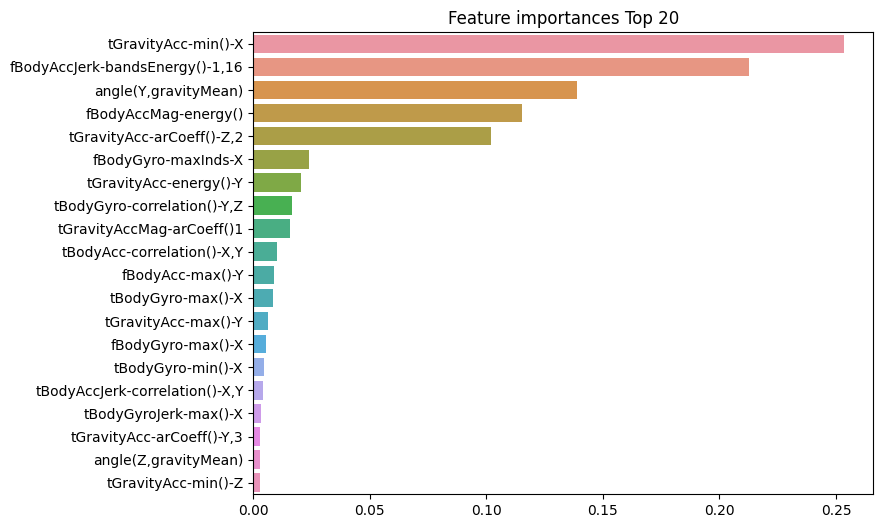

In [ ]:
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()

In [ ]:
ls ./drive/MyDrive/data/data_incom*

./drive/MyDrive/data/data_incomes.csv


In [ ]:
df_c = pd.read_csv('./drive/MyDrive/data/data_incomes.csv')

In [ ]:
df_c

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df_c.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                  'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                   'income']

In [ ]:
df_c

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df_c.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df_c = df_c.drop(['education'], axis=1)

In [ ]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [ ]:
df_c = pd.get_dummies(df_c)

In [ ]:
df_c.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 94 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   age                                         32561 non-null  int64
 1   fnlwgt                                      32561 non-null  int64
 2   education-num                               32561 non-null  int64
 3   capital-gain                                32561 non-null  int64
 4   capital-loss                                32561 non-null  int64
 5   hours-per-week                              32561 non-null  int64
 6   workclass_ ?                                32561 non-null  uint8
 7   workclass_ Federal-gov                      32561 non-null  uint8
 8   workclass_ Local-gov                        32561 non-null  uint8
 9   workclass_ Never-worked                     32561 non-null  uint8
 10  workclass_ Private                

In [ ]:
df_c.columns[92]

'income_ <=50K'

In [ ]:
df_c = df_c.drop(df_c.columns[92], axis=1)

In [ ]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 93 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   age                                         32561 non-null  int64
 1   fnlwgt                                      32561 non-null  int64
 2   education-num                               32561 non-null  int64
 3   capital-gain                                32561 non-null  int64
 4   capital-loss                                32561 non-null  int64
 5   hours-per-week                              32561 non-null  int64
 6   workclass_ ?                                32561 non-null  uint8
 7   workclass_ Federal-gov                      32561 non-null  uint8
 8   workclass_ Local-gov                        32561 non-null  uint8
 9   workclass_ Never-worked                     32561 non-null  uint8
 10  workclass_ Private                

In [ ]:
df_c.to_csv('df_cleaned.csv', index=False)

In [ ]:
!head df_cleaned.csv

age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_

In [ ]:
 X=df_c.iloc[:, :-1]
 y=df_c.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
income_col = df_c.columns[-1]

In [ ]:
income_col

'income_ >50K'

In [ ]:
df_c[income_col].value_counts()

0    24720
1     7841
Name: income_ >50K, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=156)

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=156)

기준모델

In [ ]:
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8113253900012284

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
def cross_val(classifier, num_splits=10):
    model = classifier
    scores = cross_val_score(model, X, y, cv=num_splits)
    print(np.round(scores, 4))
    print(np.round(scores.mean(), 4))

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=156)
cross_val(dt_clf, 5)

[0.8111 0.8102 0.813  0.8223 0.8188]
0.8151


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
cross_val(LogisticRegression(), 5)

[0.7966 0.7948 0.8011 0.7958 0.7786]
0.7934


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from xgboost import XGBClassifier

In [ ]:
cross_val(XGBClassifier(n_estimators=5), 5)

[0.8521 0.8558 0.8609 0.8604 0.8615]
0.8581


# RandomizedSearchCV

GridSearchCV 와 동일 동작, 파리미터들의 랜덤한 조합으로 수행 -> 빠르게 수행

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

1. GridSearchCV 사용하는 함수 작성

    입력 파라미터 : params,
     clf=DecisionTreeClassifier(random_state=156)

    cv = 5

    출력 값 : best_score, 4자리수

    출력 값 : best_estimator_ 사용 예측 수행 -> 정확도 출력

In [ ]:
def random_search_clf(params, runs=20, clf=DecisionTreeClassifier(random_state=156)):
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=156)
    rand_clf.fit(X_train, y_train)
    best_model = rand_clf.best_estimator_
    best_score = rand_clf.best_score_
    print(np.round(best_score, 4))
    print(rand_clf.best_params_)
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(np.round(acc, 4))
    return best_model

In [ ]:
params={
        'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
        'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
        'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
        'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
        'max_features':[0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
        'max_depth':[None, 2,4,6,8]
    }

In [ ]:
best_model = random_search_clf(params=params)

0.8532
{'min_samples_split': 4, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0005, 'max_leaf_nodes': 25, 'max_features': 0.85, 'max_depth': 8}
0.8536


In [ ]:
from scipy.stats import randint, uniform

In [ ]:
rgen = randint(2, 100)

In [ ]:
rgen.rvs(10)

array([54, 34, 18, 68, 24, 30, 66, 15, 99, 99])

In [ ]:
ugen = uniform(0, 1)
ugen.rvs(10)

array([0.11434759, 0.09082239, 0.34252684, 0.0012836 , 0.10784777,
       0.69825674, 0.33117569, 0.43971028, 0.54809601, 0.47835448])

In [ ]:
from sklearn.utils.fixes import loguniform

In [ ]:
lgen = loguniform(1e-5, 1)
lgen.rvs(30)

array([5.30760149e-04, 6.19772280e-05, 1.39318784e-01, 5.29431277e-01,
       6.62096858e-02, 3.68187283e-01, 4.06881184e-04, 9.44166173e-01,
       3.63984171e-04, 3.50326531e-03, 1.96846447e-04, 6.86320603e-04,
       3.01547410e-02, 1.90071504e-02, 9.57070688e-03, 6.19071684e-02,
       1.56533514e-05, 3.23729355e-01, 2.01760196e-02, 1.57598950e-02,
       2.21538662e-05, 1.43228717e-01, 3.06743225e-02, 7.91727188e-04,
       6.75680255e-02, 2.13155776e-05, 9.34165754e-01, 1.20003627e-04,
       8.75418936e-01, 7.93925082e-04])

In [ ]:
params = {'max_depth': randint(2,100),
          'max_leaf_nodes': randint(2,100),
          'max_features': loguniform(1e-5,1),
          'min_samples_split': loguniform(1e-5,1),
          'min_samples_leaf': loguniform(1e-5,1),
          'min_impurity_decrease': loguniform(1e-5,1)}

In [ ]:
dtc = DecisionTreeClassifier(random_state=156)
rs = RandomizedSearchCV(dtc, params, n_iter=100, n_jobs=-1, random_state=156, error_score='raise')
rs.fit(X_train, y_train)

print(rs.best_score_)
rs.best_params_

0.8531531531531531


{'max_depth': 58,
 'max_features': 0.6624255695136814,
 'max_leaf_nodes': 21,
 'min_impurity_decrease': 5.5450329168603574e-05,
 'min_samples_leaf': 0.0009522736788504118,
 'min_samples_split': 0.0009425074625086948}

In [ ]:
y_pred = rs.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

0.8519837857757032

In [ ]:
params = {'max_depth': randint(1,100),
          'max_leaf_nodes': randint(1,100),
          'max_features': loguniform(1e-5,1),
          'min_samples_split': loguniform(1e-5,1),
          'min_samples_leaf': loguniform(1e-5,1),
          'min_impurity_decrease': loguniform(1e-5,1),
          'min_weight_fraction_leaf': loguniform(1e-5,1)}

In [ ]:
dtc = DecisionTreeClassifier(random_state=156)
rs = RandomizedSearchCV(dtc, params, n_iter=100, n_jobs=-1, random_state=156)
rs.fit(X_train, y_train)

print('best score : ', rs.best_score_)
print('best params : ', rs.best_params_)

best score :  0.8527027027027028
best params :  {'max_depth': 81, 'max_features': 0.37033955456812256, 'max_leaf_nodes': 45, 'min_impurity_decrease': 0.0001626566360952953, 'min_samples_leaf': 0.00554244148497072, 'min_samples_split': 4.9473454373097916e-05, 'min_weight_fraction_leaf': 0.0036899267646146785}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validat

In [ ]:
feature_dict = dict(zip(X.columns, best_model.feature_importances_))

In [ ]:
import operator

In [ ]:
sorted(feature_dict.items(), key=operator.itemgetter(1), reverse=True)[:3]

[('marital-status_ Married-civ-spouse', 0.44632578286903607),
 ('capital-gain', 0.22772776559402394),
 ('education-num', 0.20816534852595694)]

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(best_model, X, y, n_jobs=-1, random_state=156)
feature_dict = dict(zip(X.columns, result.importances_mean))
sorted(feature_dict.items(), key=operator.itemgetter(1), reverse=True)[:3]

[('marital-status_ Married-civ-spouse', 0.05595651239212553),
 ('capital-gain', 0.047891649519363665),
 ('education-num', 0.043819293019256154)]